In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use("v_paper")
import deepdish as dd
%matplotlib inline
import seaborn as sns

In [2]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20

In [3]:
lobes_dict={'a1': 0,
 'a2': 1,
 'a3': 2,
 'ap1': 3,
 'ap2': 4,
 'ap3': 5,
 'b1': 6,
 'b2': 7,
 'bp1': 8,
 'bp2': 9,
 'g1': 10,
 'g2': 11,
 'g3': 12,
 'g4': 13,
 'g5': 14}

In [4]:
lobes=list(lobes_dict.keys())

In [5]:
lobes

['a1',
 'a2',
 'a3',
 'ap1',
 'ap2',
 'ap3',
 'b1',
 'b2',
 'bp1',
 'bp2',
 'g1',
 'g2',
 'g3',
 'g4',
 'g5']

# From Aso 2014  eLife 2014;3:e04577 DOI: 10.7554/eLife.04577

In [6]:
Lobes_connectivity_matrix=np.zeros((15,15))

In [7]:
# Fig 12 : Nearly all DANs have their termini confined to a single compartment; however, we identified 3 DAN types that have axon terminals in two compartments.
# Dans with axons in 2 compartments:direct connectivity (value=2)
# beta 2/beta' 2 , gamma2/alpha'1 , alpha'2 / alpha 2
# One DAN cell type (PAM-γ4<γ1γ2) has dendrites within (as well as outside) the lobes in the subdivisions indicated by an ‘O’ 

In [8]:
weight=2
Lobes_connectivity_matrix[7,9]=weight
Lobes_connectivity_matrix[9,7]=weight
Lobes_connectivity_matrix[11,3]=weight
Lobes_connectivity_matrix[3,11]=weight
Lobes_connectivity_matrix[1,4]=weight
Lobes_connectivity_matrix[4,1]=weight
Lobes_connectivity_matrix[10,13]=weight
Lobes_connectivity_matrix[11,13]=weight
# would remove next two lines if directed
Lobes_connectivity_matrix[13,10]=weight
Lobes_connectivity_matrix[13,11]=weight

In [9]:
LobesGreek=['α1', 'α2', 'α3', "α'1", "α'2", "α'3", 'β1', 'β2', "β'1", "β'2",
       'γ1', 'γ2', 'γ3', 'γ4', 'γ5']
import matplotlib as mpl
mpl.rcParams.update({'font.size': 20})

In [10]:
# Dendrites colocalisation Fig 20

In [13]:
rawa = []
with open('AsoDendriteColocalisation.txt','r') as f:
    for line in f:
        rawa.append(line.split())
dataDendrites = pd.DataFrame(rawa)

In [14]:
ArrayAsoFig20B=np.array(dataDendrites.values,dtype=float)
DANs_2_DANs=np.zeros((16,16))
for i in range(16):
    for j in range(16):
       DANs_2_DANs[i,j]=0.5*np.abs(ArrayAsoFig20B[5+i*10,(5+j*10)]-250)/250

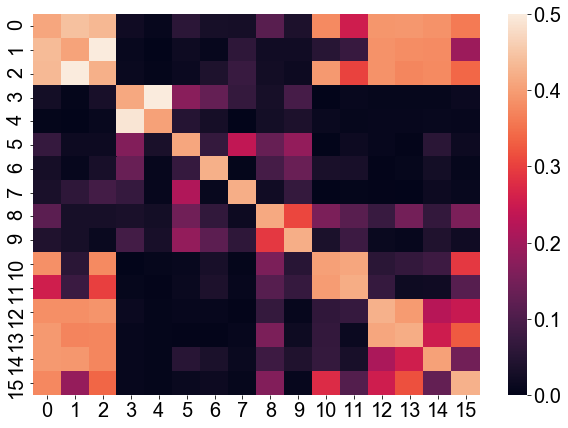

In [15]:
plt.figure(figsize=(10, 7))

# plot the heatmap
sns.heatmap(DANs_2_DANs)

In [16]:
DANsDendites=[['bp2'],['bp2'],['bp1'],['b1'],['b2'],['a2','ap2'],['a1'],['ap3'],['g1'],['a3'],['g5'],['bp2'],['g4'],['g3'],['bp2','b2'],['g2','ap1']]

In [17]:
i=0
j=0
for dans1 in DANsDendites:
    j=0
    for dans in DANsDendites:
        for dan1 in dans1:
            for dan in dans:
                k=lobes_dict[dan1]
                l=lobes_dict[dan]
                Lobes_connectivity_matrix[k,l]=Lobes_connectivity_matrix[k,l]+DANs_2_DANs[i,j]
                Lobes_connectivity_matrix[l,k]=Lobes_connectivity_matrix[l,k]+DANs_2_DANs[i,j]
        j=j+1
    i=i+1

In [18]:
# MB to DANs dendrites fig 20

In [19]:
raw = []
with open('AsoFig20MBONtoDANs.txt','r') as f:
    for line in f:
        raw.append(line.split())
data = pd.DataFrame(raw)

In [20]:
ArrayAsoFig20=np.array(data.values,dtype=float)

In [21]:
MBON_2_DANS=np.zeros((16,16))

In [22]:
for i in range(16):
    for j in range(16):
       MBON_2_DANS[i,j]=0.25*np.abs(ArrayAsoFig20[5+i*10,(5+j*10)]-250)/250

In [23]:
np.min(np.min(MBON_2_DANS))

0.0

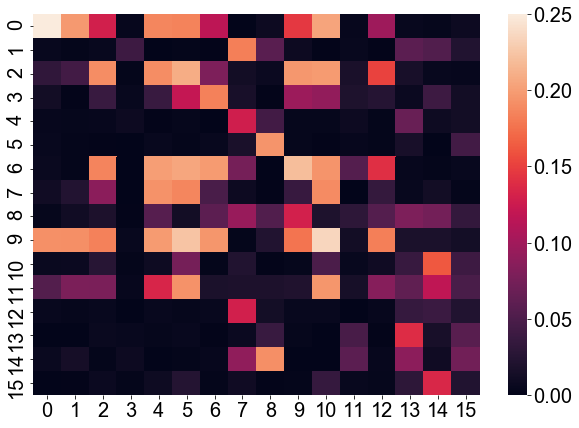

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 7))

# plot the heatmap
sns.heatmap(MBON_2_DANS)

In [25]:
MBONS=[['g5','bp2'],['b2','bp2'],['bp2'],['g4'],['b1'],['a1'],['g3','bp1'],['bp1'],['g1'],['g2','ap1'],['ap1'],['ap3'],['ap2'],['a2'],['a2'],['a3']]

In [26]:
DANs=[['g5'],['bp2'],['b2','bp2'],['b2'],['bp2'],['bp2'],['g4'],['b1'],['a1'],['g3'],['bp1'],['g1'],['g2','ap1'],['ap3'],['ap2','a2'],['a3']]

In [27]:
MBONS_sign=[-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1]

In [28]:
i=0
j=0
for mbons in MBONS:
    j=0
    for dans in DANs:
        for mbon in mbons:
            for dan in dans:
                k=lobes_dict[mbon]
                l=lobes_dict[dan]
                Lobes_connectivity_matrix[k,l]=Lobes_connectivity_matrix[k,l]+MBONS_sign[i]*MBON_2_DANS[i,j]/len(mbons)
                Lobes_connectivity_matrix[l,k]=Lobes_connectivity_matrix[l,k]+MBONS_sign[i]*MBON_2_DANS[i,j]/len(mbons)
        j=j+1
    i=i+1

In [29]:
# Fig 13: Axon/axon connection from kenyon cell input. Give an indirect connection between DANs. Add a 1 in the matrix.

# gamma KC:
# gamma4, gamma5, gamma3, gamma1, gamma2, alphap1 
# alpha-beta' KC:
# gamma2, alpha'1, alpha'2, alpha2, alpha'3, beta'2, beta'1, beta2
# alpha-beta KC:
# gamma1, alpha'2, alpha2, beta2, beta'2, beta1, alpha1, alpha 3

LobeList=set(zip(range(15),lobes))

GKC=[13,14,12,10,11,3]
ABpKC=[11,3,4,1,5,9,7]
ABKC=[10,4,1,7,9,6,0,2]

import itertools

for pair in list(itertools.product(GKC,GKC)):
    Lobes_connectivity_matrix[pair]=Lobes_connectivity_matrix[pair]+0.5

for pair in list(itertools.product(ABpKC,ABpKC)):
    Lobes_connectivity_matrix[pair]=Lobes_connectivity_matrix[pair]+0.5

for pair in list(itertools.product(ABKC,ABKC)):
    Lobes_connectivity_matrix[pair]=Lobes_connectivity_matrix[pair]+0.5

In [30]:
Lobes_connectivity_matrix_help=Lobes_connectivity_matrix

for i in range(15):
    Lobes_connectivity_matrix_help[i,i]=0

for i in range(15):
    Lobes_connectivity_matrix[i,i]=np.max(np.max(Lobes_connectivity_matrix_help))

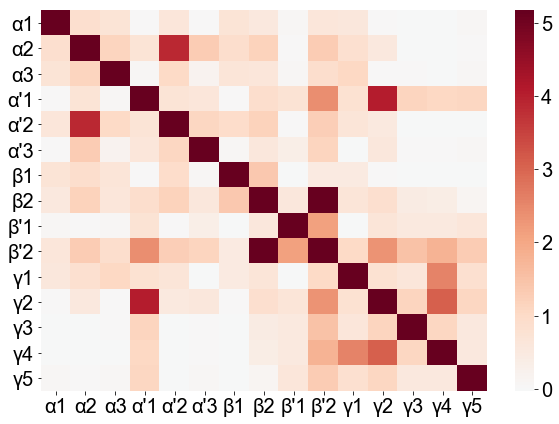

In [31]:
plt.figure(figsize=(10, 7))

# plot the heatmap
sns.heatmap(Lobes_connectivity_matrix, 
        xticklabels=LobesGreek,
        yticklabels=LobesGreek,center=0, cmap='RdBu_r')

plt.savefig('AnatMatrix.svg')
plt.savefig('AnatMatrix.png')

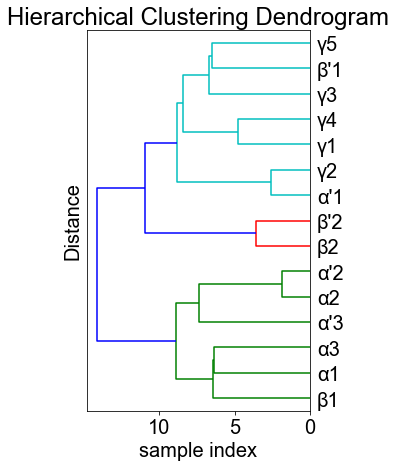

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(Lobes_connectivity_matrix, 'ward')

# calculate full dendrogram
plt.figure(figsize=(4, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    orientation="left", 
    labels=LobesGreek,
    leaf_font_size=20
)

plt.savefig('CorrelationDendogramAnat.svg')
plt.savefig('CorrelationDendogramAnat.png')

In [33]:
# Potential other less direct connections

In [34]:
# We identified three MBONs that appear to interconnect different compartments of the MB lobes> This makes additional indirect connections between the DANs

# beta1 to alpha2 and alpha 3 and alpha 1  (glut and gaba), gamma 4 to gamma 1 and gamma 2 (glu), gamma 1 to beta1 beta2 alpha1 alpha2 and alpha3 (glu)

print(sorted(LobeList))

Lobes_connectivity_matrix[6,0]+=-0.5
Lobes_connectivity_matrix[6,1]+=-0.5
Lobes_connectivity_matrix[6,2]+=-0.5
Lobes_connectivity_matrix[0,6]+=-0.5
Lobes_connectivity_matrix[1,6]+=-0.5
Lobes_connectivity_matrix[2,6]+=-0.5

Lobes_connectivity_matrix[10,13]+=-0.5
Lobes_connectivity_matrix[11,13]+=-0.5
# would remove next two lines if directed
Lobes_connectivity_matrix[13,10]+=-0.5
Lobes_connectivity_matrix[13,11]+=-0.5


Lobes_connectivity_matrix[10,6]+=-0.5
Lobes_connectivity_matrix[10,7]+=-0.5
Lobes_connectivity_matrix[10,0]+=-0.5
Lobes_connectivity_matrix[10,1]+=-0.5
Lobes_connectivity_matrix[10,2]+=-0.5

Lobes_connectivity_matrix[6,10]+=-0.5
Lobes_connectivity_matrix[7,10]+=-0.5
Lobes_connectivity_matrix[0,10]+=-0.5
Lobes_connectivity_matrix[1,10]+=-0.5
Lobes_connectivity_matrix[2,10]+=-0.5

[(0, 'a1'), (1, 'a2'), (2, 'a3'), (3, 'ap1'), (4, 'ap2'), (5, 'ap3'), (6, 'b1'), (7, 'b2'), (8, 'bp1'), (9, 'bp2'), (10, 'g1'), (11, 'g2'), (12, 'g3'), (13, 'g4'), (14, 'g5')]


In [35]:
# Old way

In [36]:
# g5 b'2a to g5 and b'2a
Lobes_connectivity_matrix[14,7]-=-0.5
Lobes_connectivity_matrix[7,14]-=-0.5

Lobes_connectivity_matrix[14,9]-=-0.5
Lobes_connectivity_matrix[9,14]-=-0.5

Lobes_connectivity_matrix[14,8]-=-0.5
Lobes_connectivity_matrix[8,14]-=-0.5

Lobes_connectivity_matrix[14,12]-=-0.5
Lobes_connectivity_matrix[12,14]-=-0.5

Lobes_connectivity_matrix[9,3]-=-0.5
Lobes_connectivity_matrix[3,9]-=-0.5

Lobes_connectivity_matrix[7,6]-=-0.5
Lobes_connectivity_matrix[6,7]-=-0.5

Lobes_connectivity_matrix[9,6]-=-0.5
Lobes_connectivity_matrix[6,9]-=-0.5

Lobes_connectivity_matrix[9,7]-=-0.5
Lobes_connectivity_matrix[7,9]-=-0.5

Lobes_connectivity_matrix[9,12]-=-0.5
Lobes_connectivity_matrix[12,9]-=-0.5

Lobes_connectivity_matrix[9,8]-=-0.5
Lobes_connectivity_matrix[8,9]-=-0.5

Lobes_connectivity_matrix[9,11]-=0.5
Lobes_connectivity_matrix[11,9]-=0.5

In [37]:
Lobes_connectivity_matrix[11,14]=1
Lobes_connectivity_matrix[14,11]=1

Lobes_connectivity_matrix[3,14]=1
Lobes_connectivity_matrix[14,3]=1

Lobes_connectivity_matrix[11,9]=1
Lobes_connectivity_matrix[9,11]=1

Lobes_connectivity_matrix[3,9]=1
Lobes_connectivity_matrix[9,3]=1

Lobes_connectivity_matrix[11,7]=1
Lobes_connectivity_matrix[7,11]=1

Lobes_connectivity_matrix[11,9]=1
Lobes_connectivity_matrix[9,11]=1

Lobes_connectivity_matrix[11,13]=1
Lobes_connectivity_matrix[13,11]=1

Lobes_connectivity_matrix[11,12]=1
Lobes_connectivity_matrix[12,11]=1

Lobes_connectivity_matrix[11,8]=1
Lobes_connectivity_matrix[8,11]=1


In [38]:
print(sorted(LobeList))

[(0, 'a1'), (1, 'a2'), (2, 'a3'), (3, 'ap1'), (4, 'ap2'), (5, 'ap3'), (6, 'b1'), (7, 'b2'), (8, 'bp1'), (9, 'bp2'), (10, 'g1'), (11, 'g2'), (12, 'g3'), (13, 'g4'), (14, 'g5')]


In [39]:
Lobes_connectivity_matrix[3,13]=1
Lobes_connectivity_matrix[13,3]=1

Lobes_connectivity_matrix[3,12]=1
Lobes_connectivity_matrix[12,3]=1

Lobes_connectivity_matrix[3,8]=1
Lobes_connectivity_matrix[8,3]=1

Lobes_connectivity_matrix[3,4]=1
Lobes_connectivity_matrix[4,3]=1

Lobes_connectivity_matrix[3,1]=1
Lobes_connectivity_matrix[1,3]=1

Lobes_connectivity_matrix[5,9]=1
Lobes_connectivity_matrix[9,5]=1

Lobes_connectivity_matrix[5,8]=1
Lobes_connectivity_matrix[8,5]=1

Lobes_connectivity_matrix[4,6]=1
Lobes_connectivity_matrix[6,4]=1

Lobes_connectivity_matrix[1,5]=1
Lobes_connectivity_matrix[5,1]=1

Lobes_connectivity_matrix[1,0]=1
Lobes_connectivity_matrix[0,1]=1

Lobes_connectivity_matrix[2,4]=1
Lobes_connectivity_matrix[4,2]=1

Lobes_connectivity_matrix[1,2]=1
Lobes_connectivity_matrix[2,1]=1

In [40]:
Lobes_connectivity_matrix[11,12]+=1
Lobes_connectivity_matrix[12,11]+=1

Lobes_connectivity_matrix[12,3]+=1
Lobes_connectivity_matrix[3,12]+=1

Lobes_connectivity_matrix[8,9]+=1
Lobes_connectivity_matrix[9,8]+=1

Lobes_connectivity_matrix[6,7]+=1
Lobes_connectivity_matrix[7,6]+=1

Lobes_connectivity_matrix[14,8]+=1
Lobes_connectivity_matrix[8,14]+=1

Lobes_connectivity_matrix[14,9]+=1
Lobes_connectivity_matrix[9,14]+=1

Lobes_connectivity_matrix[13,9]+=1
Lobes_connectivity_matrix[9,13]+=1

Lobes_connectivity_matrix[13,8]+=1
Lobes_connectivity_matrix[8,13]+=1

Lobes_connectivity_matrix[13,7]+=1
Lobes_connectivity_matrix[7,13]+=1

Lobes_connectivity_matrix[13,11]+=1
Lobes_connectivity_matrix[11,13]+=1

Lobes_connectivity_matrix[13,3]+=1
Lobes_connectivity_matrix[3,13]+=1

Lobes_connectivity_matrix[12,9]+=1
Lobes_connectivity_matrix[9,12]+=1

Lobes_connectivity_matrix[12,8]+=1
Lobes_connectivity_matrix[8,12]+=1

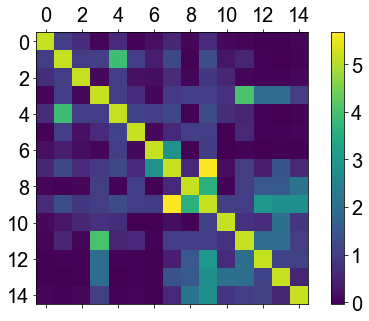

In [41]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
cax = ax.matshow(Lobes_connectivity_matrix,interpolation='nearest')
fig.colorbar(cax)

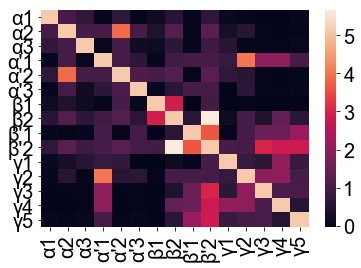

In [43]:
import seaborn as sns
# plot the heatmap
sns.heatmap(Lobes_connectivity_matrix, 
        xticklabels=LobesGreek,
        yticklabels=LobesGreek)